In [1]:
# import required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

from sklearn.model_selection import train_test_split

# Dimensionality reduction

In [2]:
# import breast cancer data from sklearn
from sklearn.datasets import load_breast_cancer
bc_data = load_breast_cancer()
df_x = pd.DataFrame(bc_data.data,columns=bc_data.feature_names)
df_y = pd.DataFrame(bc_data.target)

In [3]:
df_x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
print(df_x.shape,df_y.shape)

(569, 30) (569, 1)


The dataset has 30 features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc936302150>,
      dtype=object)

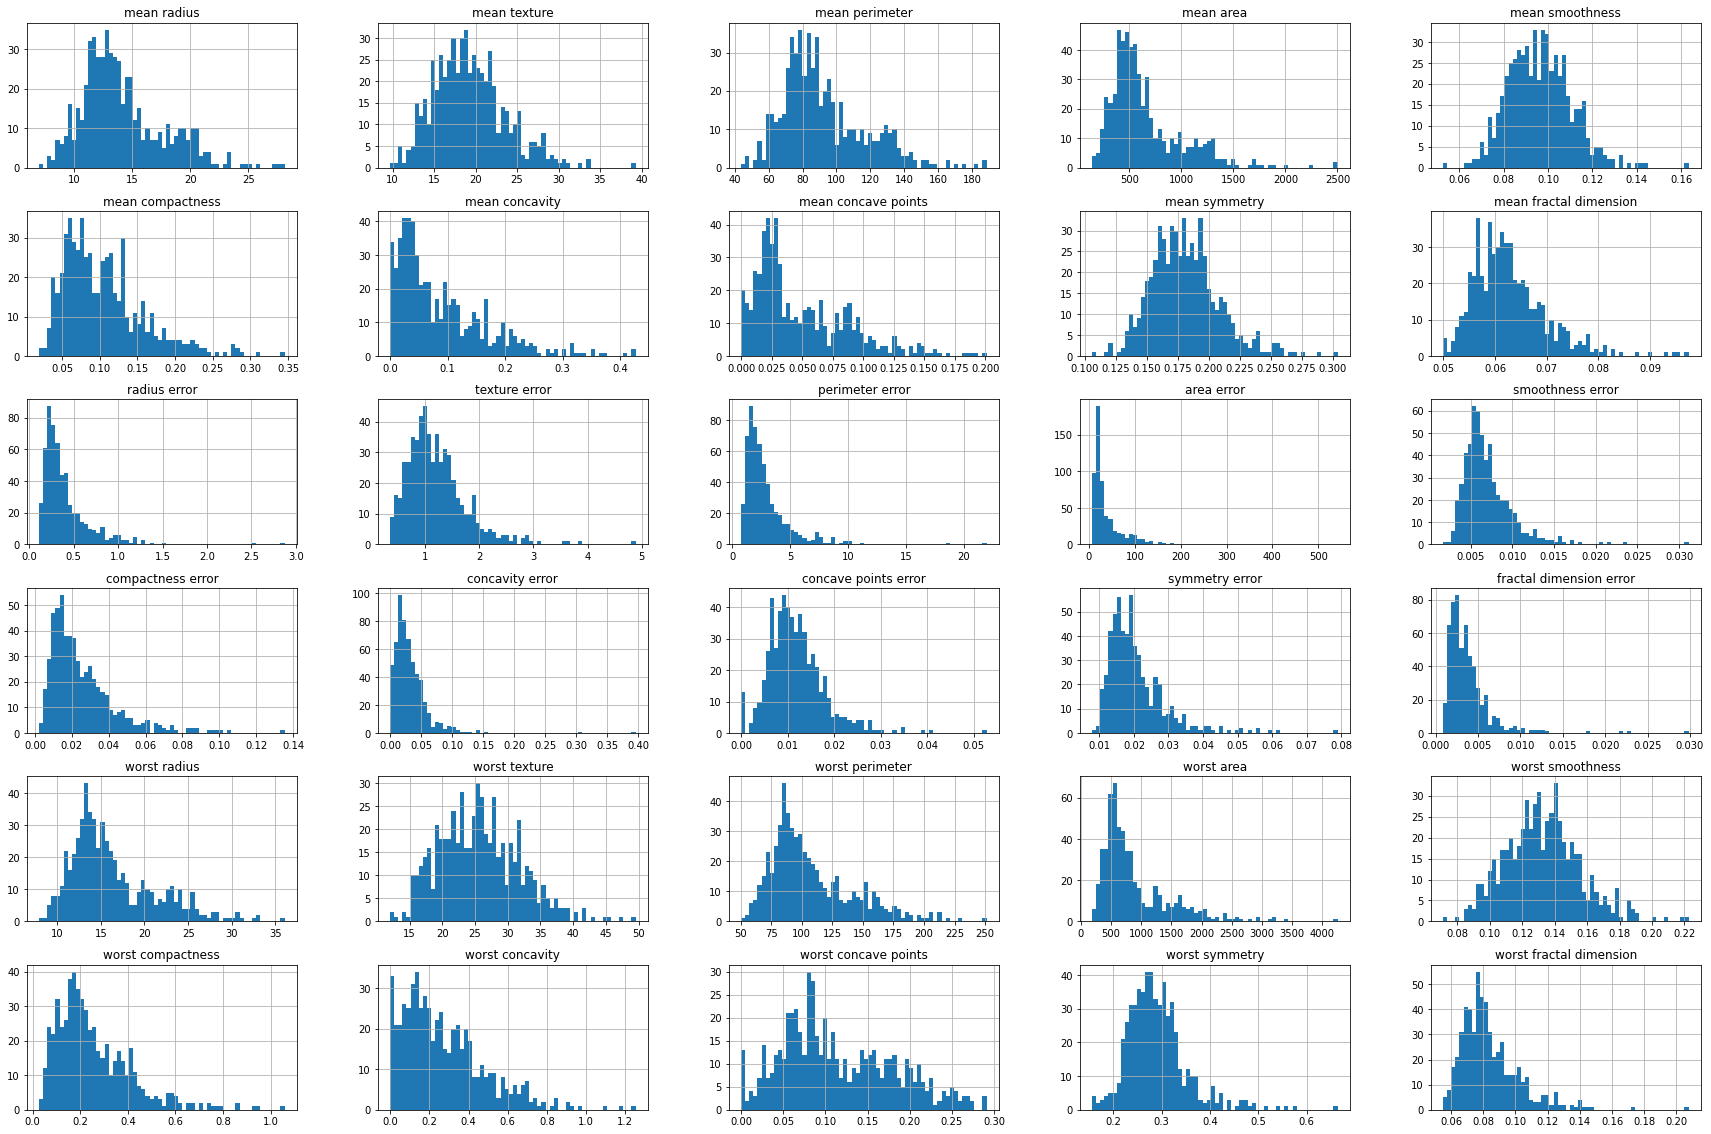

In [5]:
df_x.hist(bins=60,figsize=(30,20))

## Apply Logistic Regression without dimensionality reduction




In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [7]:
# split the data into test and train data
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [8]:
reg_model = LogisticRegression(class_weight="balalnced")
reg_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balalnced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
score = cross_val_score(reg_model,x_test,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

Accuracy = 0.921


## Linear

### 1. PCA - Principal Component Analysis

PCA is a linear and unsupervised dimensionality reduction technique

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

In [11]:
stages = [("PCA",PCA(n_components = 20)), ("m",LogisticRegression(class_weight="balanced")),]
model_PCA = Pipeline(steps=stages)

In [12]:
model_PCA.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=20,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('m',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [13]:
%%time
score = cross_val_score(model_PCA ,x_test,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

Accuracy = 0.929
CPU times: user 37.3 ms, sys: 37 ms, total: 74.3 ms
Wall time: 176 ms


### 2. SVD - Singular Value Decomposition

Similar to PCA, SVD is also a linear and unsupervised dimensionality reduction technique

In [14]:
from sklearn.decomposition import TruncatedSVD

In [15]:
stages = [("SVD",TruncatedSVD(n_components = 20)), ("m",LogisticRegression(class_weight="balanced")),]
model_SVD = Pipeline(steps=stages)

In [16]:
model_SVD.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('SVD',
                 TruncatedSVD(algorithm='randomized', n_components=20, n_iter=5,
                              random_state=None, tol=0.0)),
                ('m',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [17]:
%%time
score = cross_val_score(model_SVD ,x_test,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

Accuracy = 0.904
CPU times: user 42.7 ms, sys: 31 ms, total: 73.7 ms
Wall time: 187 ms


## Non-linear

### 1. LLE - Locally Linear Embedding

LLE is a non-linear and unsupervised dimensionality reduction technique. 
The non-linear techniques typically takes more time compared to that of linear techniques.

In [18]:
from sklearn.manifold import LocallyLinearEmbedding

In [19]:
stages = [("LLE",LocallyLinearEmbedding(n_components = 20)), ("m",LogisticRegression(class_weight="balanced")),]
model_LLE = Pipeline(steps=stages)

In [20]:
model_LLE.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('LLE',
                 LocallyLinearEmbedding(eigen_solver='auto', hessian_tol=0.0001,
                                        max_iter=100, method='standard',
                                        modified_tol=1e-12, n_components=20,
                                        n_jobs=None, n_neighbors=5,
                                        neighbors_algorithm='auto',
                                        random_state=None, reg=0.001,
                                        tol=1e-06)),
                ('m',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
       

In [21]:
%%time
score = cross_val_score(model_LLE ,x_test,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

Accuracy = 0.868
CPU times: user 39.5 ms, sys: 52.8 ms, total: 92.3 ms
Wall time: 178 ms


### 2. ISOMAP - Isomap Embedding

Isomap is also a non-linear and unsupervised dimensionality reduction technique.

In [22]:
from sklearn.manifold import Isomap

In [23]:
stages = [("ISOMAP",Isomap(n_components = 20)), ("m",LogisticRegression(class_weight="balanced")),]
model_ISOMAP = Pipeline(steps=stages)

In [24]:
model_ISOMAP.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('ISOMAP',
                 Isomap(eigen_solver='auto', max_iter=None, metric='minkowski',
                        metric_params=None, n_components=20, n_jobs=None,
                        n_neighbors=5, neighbors_algorithm='auto', p=2,
                        path_method='auto', tol=0)),
                ('m',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [25]:
%%time
score = cross_val_score(model_ISOMAP ,x_test,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

Accuracy = 0.806
CPU times: user 40.1 ms, sys: 38.1 ms, total: 78.2 ms
Wall time: 211 ms


### 3. UMAP - Uniform Manifold Approximation and Projection

In [26]:
!pip install umap-learn
import umap

     |████████████████████████████████| 86 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 17.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=e37b52cb2b7c35f9bb31bf2feafd7466c031bb77ff981ea04ae9783253043158
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=3ee1022b3e8045b103219d80dd778f2c1cb8d7370ffd8f72c3c4fa91938cb7bc
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [27]:
stages = [("UMAP",umap.UMAP(n_components = 20)), ("m",LogisticRegression(class_weight="balanced")),]
model_UMAP = Pipeline(steps=stages)

In [28]:
model_UMAP.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

Pipeline(memory=None,
         steps=[('UMAP',
                 UMAP(a=None, angular_rp_forest=False, b=None, dens_frac=0.3, dens_lambda=2.0, dens_var_shift=0.1, densmap=False, disconnection_distance=None, force_approximation_algorithm=False, init='spectral', learning_rate=1.0, local_connectivity=1.0, low_memory=True, metric='euclidean', metric_kwds=None, min_dist=0.1, n_components=20, n_epoc...de='embedding', transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)),
                ('m',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False)

In [29]:
%%time
score = cross_val_score(model_UMAP ,x_test,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy = 0.894
CPU times: user 616 ms, sys: 96.8 ms, total: 713 ms
Wall time: 1min 38s


### 4. t-SNE - T-distributed Stochastic Neighbor Embedding

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [31]:
X_normalized = StandardScaler().fit(df_x).transform(df_x)
tsne = TSNE(random_state = 0)
X_tsne = tsne.fit_transform(X_normalized)
print(df_x.shape, X_tsne.shape)

(569, 30) (569, 2)


In [32]:
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, df_y, random_state=0)
model_tSNE = LogisticRegression(random_state=0)
model_tSNE.fit(X_train_tsne, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
%%time
score = cross_val_score(model_tSNE ,X_test_tsne,y_test,scoring = "accuracy", n_jobs=-1)
print(f"Accuracy = {np.mean(score):.3f}")

Accuracy = 0.929
CPU times: user 98.3 ms, sys: 957 µs, total: 99.3 ms
Wall time: 71.5 ms



## Conclusion

Logistic Regression Model  | Accuracy | CPU time (ms) | Wall time (ms)
-------------------|------------------|------------------|------------------
Basic | 0.921 | - | -
PCA  | 0.929 | 69.6 | 193
SVD  | 0.904 | 56.5 | 181
LLE  | 0.868 | 97.3 | 178
ISOMAP  | 0.806 | 75.4 | 225
UMAP  | 0.894 | 648 | 34000
t-SNE | 0.929 | 85.5 | 82





*  The accuracy of Logistic Regression model on breast cancer dataset is 92.1%. 
*  Out of all the dimensionality reduction algorithms, PCA and t-SNE performed well with an accuracy of 92.9%. The best performing technique is PCA with lower CPU time i.e; total time the processor is actively working on a task.
*  Isomap method performed poorly compared to other methods with an accuracy of 80.6%.
* UMAP technique has the longest CPU time.








